In [ ]:
#Import necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import  RFE, mutual_info_regression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Since the datatype type of acidity is object, let us convert it to numeric

In [ ]:
# Remove the row with the string 'Created_by_Nidula_Elgiriyewithana' in the 'Acidity' column
df = df[df["Acidity"] != 'Created_by_Nidula_Elgiriyewithana']

# Convert the 'Acidity' column to float
df["Acidity"] = df["Acidity"].astype("float64")
df.dtypes

,0
A_id,float64
Size,float64
Weight,float64
Sweetness,float64
Crunchiness,float64
Juiciness,float64
Ripeness,float64
Acidity,float64
Quality,int64


In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [ ]:
#Checking the null values
print(f"The number of null values in each row:\n{df.isnull().sum()}")

The number of null values in each row:
A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


Since most of the attributes are numeric in nature let us check if there are Not a number values in the dataset.

There are no NaN values as well.

In [ ]:
np.isnan(df.select_dtypes(include="float64")).sum()

,0
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0


There are no NaN values as well in the dataset

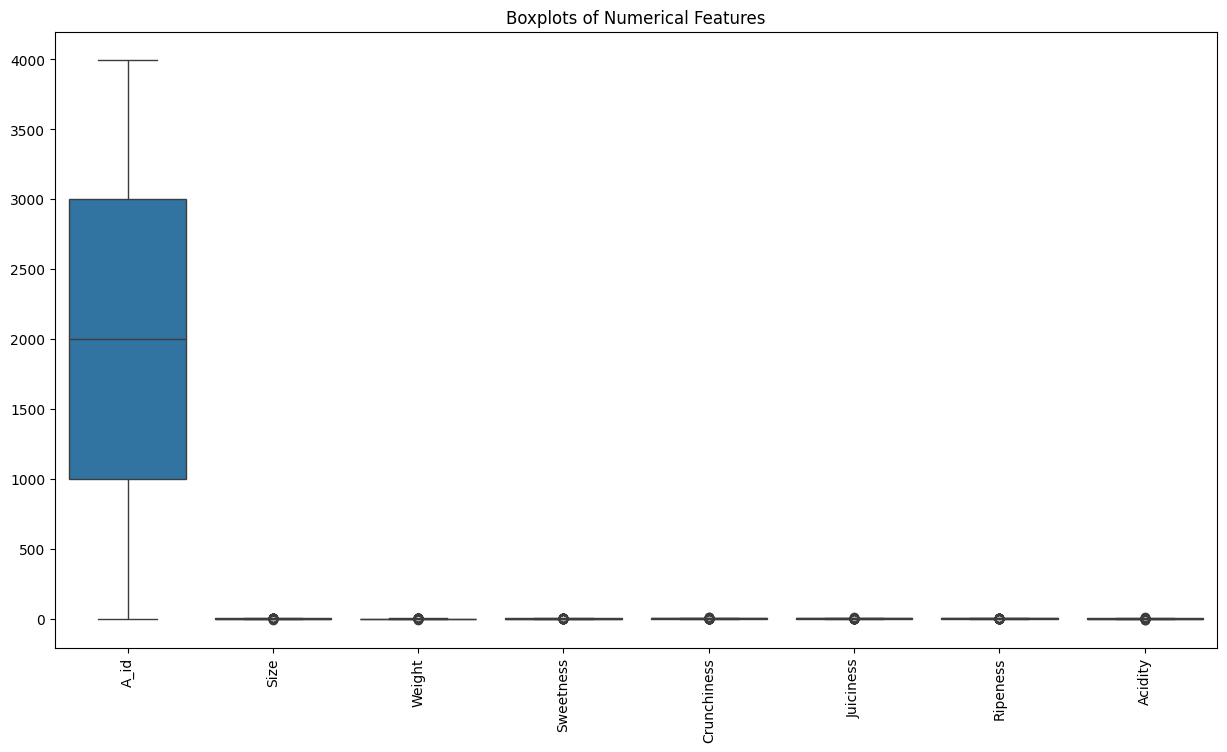

In [ ]:
#Function for checking for outliers using boxplot
def outliers_visualizer(X):
  plt.figure(figsize=(15, 8))
  sns.boxplot(data=df.select_dtypes(include=['float64']))
  plt.xticks(rotation=90)  # Rotate labels for readability
  plt.title("Boxplots of Numerical Features")
  plt.show()

#Call the function
outliers_visualizer(df)

In [ ]:
#Check for outliers
def check_outliers(X):
  numercial_features = X.select_dtypes(include = 'float64').columns
  outlier_counts = {}
  for feature in numercial_features:
      Q1 = X[feature].quantile(0.25)
      Q3 = X[feature].quantile(0.75)
      IQR = Q3 - Q1
      lower_limit = Q1 - 1.5 * IQR
      upper_limit = Q3 + 1.5 * IQR
      # Clip the outliers
      X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)

    # Store count of outliers
      outliers = X[(X[feature] < lower_limit) | (X[feature] > upper_limit)]
      outlier_counts[feature] = outliers.shape[0]


  return outlier_counts

#Apply the function
check_outliers(df)


{'A_id': 0,
 'Size': 0,
 'Weight': 0,
 'Sweetness': 0,
 'Crunchiness': 0,
 'Juiciness': 0,
 'Ripeness': 0,
 'Acidity': 0}

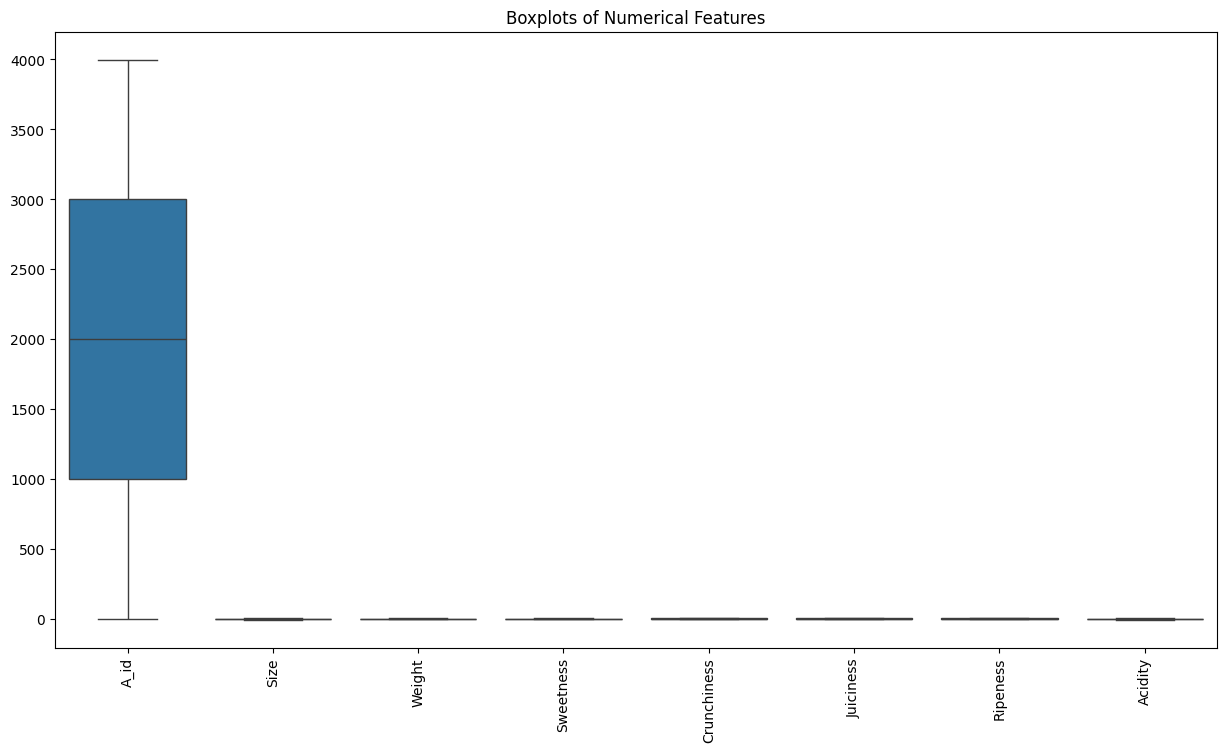

In [ ]:
#Visualize outliers after clipping them
outliers_visualizer(df)

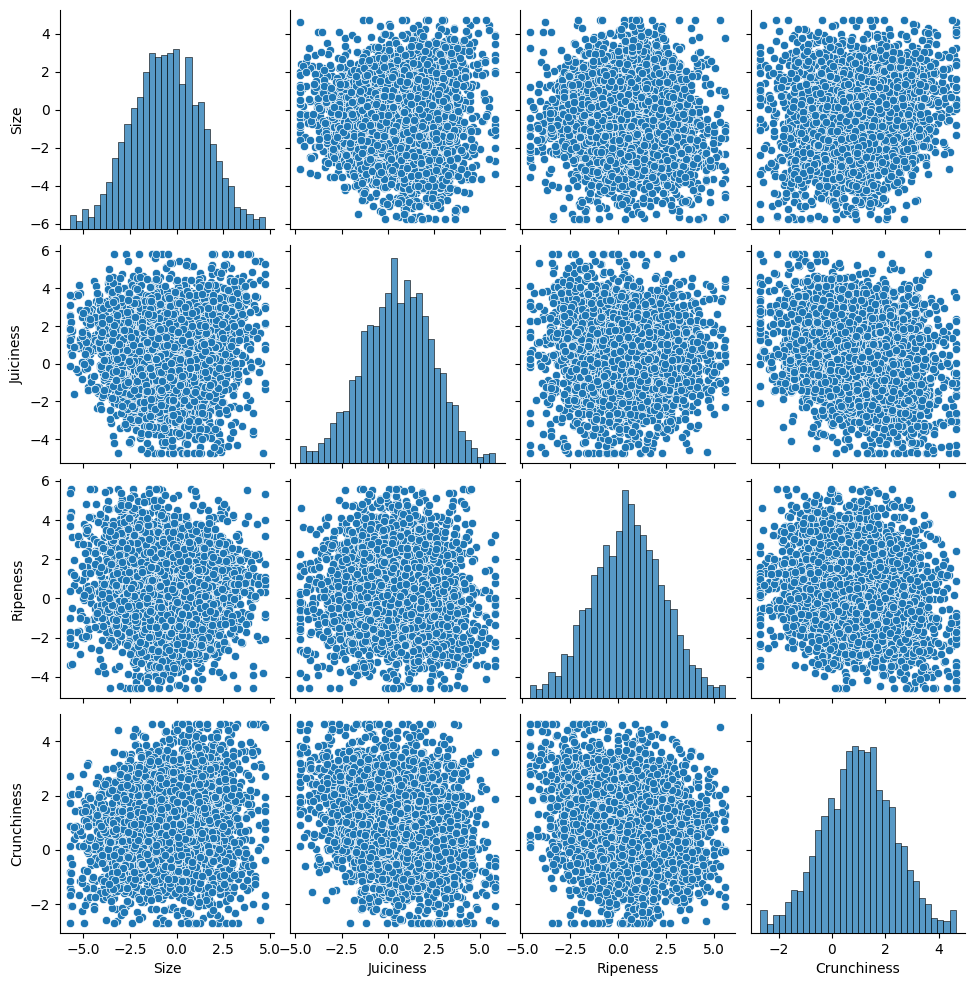

In [ ]:
#Visualize the selected features
sns.pairplot(df, vars = ['Size', 'Juiciness', 'Ripeness', 'Crunchiness'])

In [ ]:
# Observe correlations
correlation = df.select_dtypes(include= "float64").corr()
correlation

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
A_id,1.000000,-0.028722,-0.005954,-0.001819,-0.013516,0.005579,0.000252,-0.022019
Size,-0.028722,1.000000,-0.166974,-0.324412,0.169820,-0.019437,-0.135910,0.196334
Weight,-0.005954,-0.166974,1.000000,-0.152070,-0.095068,-0.092135,-0.243678,0.019696
Sweetness,-0.001819,-0.324412,-0.152070,1.000000,-0.033874,0.095436,-0.273578,0.084710
Crunchiness,-0.013516,0.169820,-0.095068,-0.033874,1.000000,-0.257884,-0.200391,0.071793
Juiciness,0.005579,-0.019437,-0.092135,0.095436,-0.257884,1.000000,-0.098975,0.248688
Ripeness,0.000252,-0.135910,-0.243678,-0.273578,-0.200391,-0.098975,1.000000,-0.201941
Acidity,-0.022019,0.196334,0.019696,0.084710,0.071793,0.248688,-0.201941,1.000000


<Axes: >

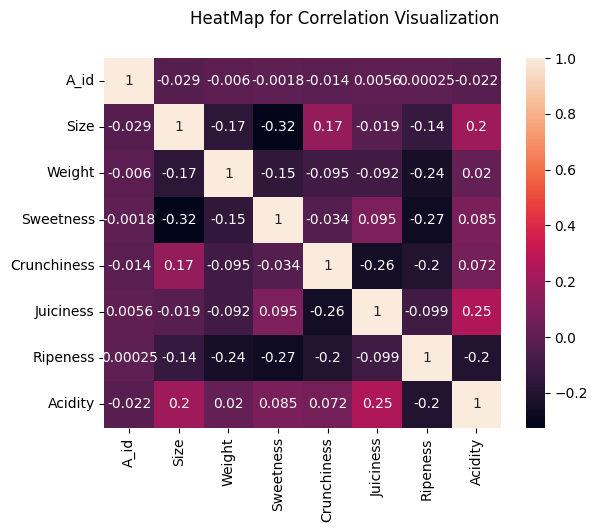

In [ ]:
# Heatmap for correlation visaulization
plt.suptitle("HeatMap for Correlation Visualization")
sns.heatmap(data = correlation, annot = True)

In [ ]:
# Label distribution in Categorical variable
print(df["Quality"].value_counts())
# Access the top 5 rows
df["Quality"].head()

Quality
good    2004
bad     1996
Name: count, dtype: int64


,Quality
0,good
1,good
2,bad
3,good
4,good


Since the Quality is a ordinal categorical feature, we will proceed with label encoding

In [ ]:
#Label Encoding the Quality
le = LabelEncoder()
df["Quality"] = le.fit_transform(df["Quality"])
df["Quality"].head()

,Quality
0,1
1,1
2,0
3,1
4,1


1 is assigned to Good labels whereas 0 is assigned to bad labels

In [ ]:
#Splitting the dataset into feature matrix and label vector
X = df.drop(columns=["A_id", "Acidity"])
y = df['Acidity']

In [ ]:
def train_test_split(X, y, test_size = 0.3, random_seed = 42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test
#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size= 0.3, random_seed= 42)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 7)
(2800, 7)
(1200, 7)
(4000,)
(2800,)
(1200,)


In [ ]:
# Standardize the values using normalization
def normalize(df):
    """
    Normalize features using min-max normalization.

    This function scales all features to a range between 0 and 1 using the formula:
    x_normalized = (x - min(x)) / (max(x) - min(x))

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing features to normalize.

    Returns:
    --------
    result : pandas.DataFrame
        Normalized DataFrame with the same shape as input.
    """
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Convert numpy arrays back to pandas DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Apply normalization to the training and test sets
X_train_normalized = normalize(X_train_df)
X_test_normalized = normalize(X_test_df)

# Print the shapes of the normalized datasets
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"X_test_normalized shape: {X_test_normalized.shape}")

# Print the first few rows of the normalized training set
X_train_normalized.head()

X_train_normalized shape: (2800, 7)
X_test_normalized shape: (1200, 7)


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality
0,0.698440,0.253396,0.435217,0.339790,0.744331,0.413835,1.0
1,0.803923,0.731067,0.445344,0.672753,0.422351,0.197261,0.0
2,0.442863,0.615904,0.630405,0.355525,0.696813,0.393274,1.0
3,0.415697,0.726659,0.330971,0.510273,0.434620,0.594369,1.0
4,0.595898,0.395743,0.684938,0.297014,0.354345,0.350368,1.0


In [ ]:
# Linear Regression from scratch
class LinearRegressionFromScratch:
    """
    A simple implementation of Linear Regression using gradient descent optimization.

    This class implements linear regression from scratch without using any machine learning
    libraries. It uses batch gradient descent to minimize the mean squared error loss function.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size used in gradient descent optimization.
    iterations : int, default=1000
        Number of iterations for the gradient descent optimization.

    Attributes:
    -----------
    theta : ndarray of shape (n_features,)
        Coefficients for the linear regression model.
    bias : float
        Intercept term in the linear model.
    m : int
        Number of training examples.
    n : int
        Number of features.
    X : ndarray of shape (m_samples, n_features)
        Training data.
    y : ndarray of shape (m_samples,)
        Target values.
    """

    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        """
        Fit the linear regression model using gradient descent.

        Parameters:
        -----------
        X : ndarray of shape (m_samples, n_features)
            Training data.
        y : ndarray of shape (m_samples,)
            Target values.

        Returns:
        --------
        self : object
            Returns the instance itself.
        """
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        for _ in range(self.iterations):
            self.update_weights()

        return self

    def update_weights(self):
        """
        Update model parameters using gradient descent.

        This method calculates the gradients of the loss function with respect to
        theta (coefficients) and bias, then updates them using the learning rate.
        """
        y_pred = self.predict(self.X)
        d_theta = -(2 / self.m) * np.dot(self.X.T, (self.y - y_pred))
        d_bias = -(2 / self.m) * np.sum(self.y - y_pred)

        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        """
        Predict using the linear regression model.

        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            Samples to predict.

        Returns:
        --------
        y_pred : ndarray of shape (n_samples,)
            Predicted values.
        """
        return np.dot(X, self.theta) + self.bias


In [ ]:
# Initialize the model
LR = LinearRegressionFromScratch()
# Fit the model
LR.fit(X_train_normalized, y_train)
#Make predictions
y_scratch_predictions_lr = LR.predict(X_test_normalized)
# Print predictions
y_scratch_predictions_lr[:5]

array([ 0.0058782 ,  0.89789709,  0.66861701, -0.58560868, -0.44720692])

Model Evalaution and Predictiions on Training Set

In [ ]:
# Make predictions
y_pred_train = LR.predict(X_train_normalized)

# Model Evaluation on Training Set
# MSE(Training Set)
mse_training = mean_squared_error(y_train, y_pred_train)
# r2 score Training Set
r2_training = r2_score(y_train, y_pred_train)

In [ ]:
# Print the metrics(Training Set)
print(f"MSE of linear model(Scratch)(Training Set){mse_training:.2f}")

print(f"r2 of linear model(Scratch)(Training Set){r2_training:.2f}")

MSE of linear model(Scratch)(Training Set)3.90
r2 of linear model(Scratch)(Training Set)0.11


In [ ]:
#Model Evaluation(Testing Set)
mse_scratch_lr = mean_squared_error(y_test, y_scratch_predictions_lr)
print(f"MSE of linear model(Scratch){mse_scratch_lr:.4f}")
r2_scratch_lr = r2_score(y_test, y_scratch_predictions_lr)
print(f"r2 of linear model(Scratch){r2_scratch_lr:.2f}")

MSE of linear model(Scratch)4.0009
r2 of linear model(Scratch)0.11


Building Two Regression Model using sklearn
Model 1: Linear Regression Using sklearn
Model 2: Decision Tree Regressor Using sklearn

In [ ]:
# Linear Regression using sklearn
lr = LinearRegression()
# Fit the model
lr.fit(X_train_normalized, y_train)
# Make predictions
y_pred_lr= lr.predict(X_test_normalized)
# Print predictions
y_pred_lr[:5]

array([-0.14738915,  1.99745638,  1.72387713, -1.28254474, -1.72594199])

In [ ]:
#Model Evaluation for Linear Regression
# MSE of linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"The mean squared error using linear regression(sklearn): {mse_lr:.2f}")
#r2 score of linear regression model
r2_lr = r2_score(y_test, y_pred_lr)
print(f"The r2 score using linear regression(sklearn): {r2_lr:.2f}")

The mean squared error using linear regression(sklearn): 3.62
The r2 score using linear regression(sklearn): 0.19


In [ ]:
#Decision Tree Regressor using sklearn
knnRegressor = KNeighborsRegressor()
# Fit the model
knnRegressor.fit(X_train_normalized, y_train)
# Make predictions
y_pred_knn = knnRegressor.predict(X_test_normalized)
# Print predictions
y_pred_knn[:5]

array([-0.28985323,  1.97723768,  0.4287658 ,  0.29830062, -1.60002725])

In [ ]:
#Model Evaluation for Decision Tree Regressor
# Mean squared error of the decision tree regressor
mse_dtr = mean_squared_error(y_test, y_pred_knn)
print(f"The mean squared error using KNN Regressor(sklearn): {mse_dtr:.2f}")
r2_dtr = r2_score(y_test, y_pred_knn)
print(f"The r2 score using KNN Regressor(sklearn): {r2_dtr:.2f}")

The mean squared error using KNN Regressor(sklearn): 2.12
The r2 score using KNN Regressor(sklearn): 0.53


KNN Regressor outperformed linear regression with higher r2 score and lower mean squared error

Hyperparameter Tuning with Cross Validation

In [ ]:
# Define the parameter grid for Linear Regression (Ridge Regression)
param_grid_lr = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the parameter grid for KNN Regressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the models
ridge = Ridge()
knn = KNeighborsRegressor()

# Initialize GridSearchCV for both models
grid_search_lr = GridSearchCV(estimator=ridge, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the models
grid_search_lr.fit(X_train_normalized, y_train)
grid_search_knn.fit(X_train_normalized, y_train)

# Get the best parameters and best score for linear regression
best_params_lr = grid_search_lr.best_params_
best_score_lr = -grid_search_lr.best_score_

# Get the best parameters and best score for KNN regression
best_params_knn = grid_search_knn.best_params_
best_score_knn = -grid_search_knn.best_score_

print(f"Best parameters for Linear Regression: {best_params_lr}")
print(f"Best cross-validated MSE for Linear Regression: {best_score_lr:.2f}")

print(f"Best parameters for KNN Regressor: {best_params_knn}")
print(f"Best cross-validated MSE for KNN Regressor: {best_score_knn:.2f}")

Best parameters for Linear Regression: {'alpha': 0.1, 'solver': 'lsqr'}
Best cross-validated MSE for Linear Regression: 3.56
Best parameters for KNN Regressor: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validated MSE for KNN Regressor: 2.01


Since the KNN regressor has smaller MSE than compared to Linear Regression. I will go ahead with KNN regressor for final model building.


In [ ]:
#Feature Selection for ridge regression
ridge = Ridge(alpha=1.0)
rfe = RFE(ridge, n_features_to_select=5)  # Keep the top 5 features
rfe.fit(X_train_normalized, y_train)

# Get selected feature names
selected_features = X_train_normalized.columns[rfe.support_]

X_train_selected = X_train_normalized[selected_features]
X_test_selected = X_test_normalized[selected_features]

print("Selected Features:", selected_features.tolist())


Selected Features: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness']


In [ ]:
#Feature Selection for KNN Regressor
mi_scores = mutual_info_regression(X_train_normalized, y_train)
mi_df = pd.DataFrame({'Feature': X_train_normalized.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Select top N features
selected_features = mi_df[mi_df['MI Score'] > 0.01]['Feature']
X_train_selected = X_train_normalized[selected_features]
X_test_selected = X_test_normalized[selected_features]

# Print the selected features
print("Selected Features for KNN Regression:", selected_features.tolist())


Selected Features for KNN Regression: ['Size', 'Juiciness', 'Ripeness', 'Crunchiness']


Since the final model is to be built with KNN Regressor. I will go with the above selected features.

In [ ]:
# Prepare the dataframe
selected_features = ['Juiciness', 'Size', 'Crunchiness', 'Ripeness']
X_train_selected = X_train_normalized[selected_features]
X_test_selected = X_test_normalized[selected_features]

Final Model Building with KNN regressor
'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance

In [ ]:
# Initialize the final model
knn_final = KNeighborsRegressor(metric = "euclidean", n_neighbors= 9, weights = "distance")
# Fit the model
knn_final.fit(X_train_selected, y_train)
# Make predictions
y_final_pred = knn_final.predict(X_test_selected)
# Print the predictions
y_final_pred[:10]

array([-0.17011406,  2.04961863,  0.41397469, -1.01112869, -1.02486193,
       -0.37029597,  0.90267006, -0.76451108, -1.00099677,  0.93053391])

In [ ]:
# Calculate Mean Squared Error (MSE)
mse_final = mean_squared_error(y_test, y_final_pred)
print(f"Mean Squared Error (MSE): {mse_final:.4f}")

# Calculate R-squared (R²) score
r2_final = r2_score(y_test, y_final_pred)
print(f"R-squared (R²) Score: {r2_final:.4f}")

Mean Squared Error (MSE): 3.2586
R-squared (R²) Score: 0.2729


Conclusion:

I did hyperparameter tuning using GridSearchCV for models like Ridge Regression, and KNN Regressor. Feature selection was performed using RFE and mutual information. The final model’s performance was evaluated using RMSE and R² and based on metrics final model performance remain stagnant or in the similar range that other model except knn regressor performed.